In [1]:
"""
Author https://github.com/boguss1225
Reference : https://github.com/calmisential/TensorFlow2.0_Image_Classification
"""
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import pandas as pd
import config
from utils.evaluate import eval_model
from utils.prepare_data import get_datasets
from utils.pretrained_models import pretrained_model
import matplotlib.pyplot as plt
import config

2023-01-10 12:02:03.948540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-10 12:02:04.857661: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-01-10 12:02:04.857717: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-01-10 12:02:04.857723: W tensorflow/c

In [2]:
# SELECT GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
# SELECT MODEL

available_models=["Xception",
                  "EfficientNetB0", "EfficientNetB1", "EfficientNetB2",
                  "EfficientNetB3", "EfficientNetB4", "EfficientNetB5",
                  "EfficientNetB6", "EfficientNetB7",
                  "EfficientNetV2B0", "EfficientNetV2B1",
                  "EfficientNetV2B2", "EfficientNetV2B3",
                  "EfficientNetV2S", "EfficientNetV2M", "EfficientNetV2L",
                  "VGG16","VGG19",
                  "DenseNet121", "DenseNet169", "DenseNet201",
                  "NASNetLarge","NASNetMobile",
                  "InceptionV3","InceptionResNetV2"
                  ]

def get_model():
    model = pretrained_model(model_name="DenseNet121",
                            load_weight=None)

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  metrics=['accuracy', # add more metrics if you want
                            tf.keras.metrics.AUC(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            ])
    return model

In [4]:
# GPU settings
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# LOAD DATA
train_generator, valid_generator, test_generator, \
train_num, valid_num, test_num = get_datasets()

Found 1191 images belonging to 11 classes.
Found 327 images belonging to 11 classes.
Found 189 images belonging to 11 classes.


In [6]:
"""
Apply image data augmentation in 'utils.prepare_data.py' manually
"""
config.image_height

128

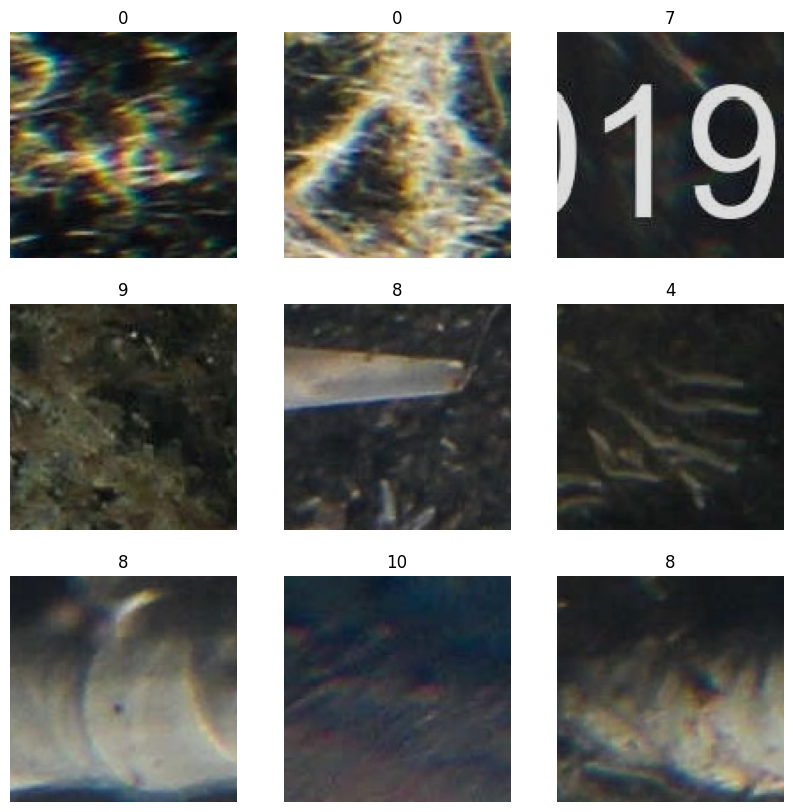

In [7]:
"""
## Visualize the data after augmentaion
Here are the first 9 images in the training dataset. 
Label 0 : "Beggiatoa 1 (thick mat)"
Label 1 : "Beggiatoa 2 (patchy)"
Label 2 : "Beggiatoa 3 (thin film)"
Label 3 : "Worm 1 (Ophryotroca shieldsii - thin colony)"
Label 4 : "Worm 2 (Schistomeringos lovenii - thick worms)"
"""
if config.BATCH_SIZE > 9 :
    range_val = 9
else :
    range_val = config.BATCH_SIZE

plt.figure(figsize=(10, 10))
for i in range(range_val):
    ax = plt.subplot(3, 3, i + 1)
    img, label = train_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

In [8]:
"""
Callbacks
"""

# tensorboard = tf.keras.callbacks.TensorBoard(log_dir='log')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=config.model_dir+config.model_save_name+".keras",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=50,
    restore_best_weights=True
)

callbacks = [
#     tensorboard, 
    model_checkpoint_callback, 
    early_stop_callback
]

In [9]:
model = get_model()
# tf.keras.utils.plot_model(model, show_shapes=True)

2023-01-10 12:02:07.503117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-10 12:02:07.977626: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43654 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:81:00.0, compute capability: 8.6


In [10]:
"""
Train the model
"""
# mkdir for model save path
if not os.path.exists(config.model_dir):
    os.makedirs(config.model_dir)
    
history = model.fit(train_generator,
                    epochs=1000,
                    steps_per_epoch=train_num // config.BATCH_SIZE,
                    validation_data=train_generator,
                    validation_steps=valid_num // config.BATCH_SIZE,
                    callbacks=callbacks)

Epoch 1/1000


2023-01-10 12:02:32.617816: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-01-10 12:02:33.830223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-10 12:02:33.833538: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55b9c409e160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-10 12:02:33.833570: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-01-10 12:02:33.838432: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-10 12:02:33.948386: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 [==============================] - 57s 337ms/step - loss: 2.1544 - accuracy: 0.3106 - auc: 0.6900 - precision: 0.7931 - recall: 0.0408 - val_loss: 4.3794 - val_accuracy: 0.1250 - val_auc: 0.5414 - val_precision: 0.1250 - val_recall: 0.1250
Epoch 2/1000
18/18 [==============================] - 2s 122ms/step - loss: 1.6271 - accuracy: 0.4153 - auc: 0.8544 - precision: 0.8384 - recall: 0.1704 - val_loss: 5.3728 - val_accuracy: 0.1156 - val_auc: 0.5266 - val_precision: 0.1156 - val_recall: 0.1156
Epoch 3/1000
18/18 [==============================] - 2s 120ms/step - loss: 1.5348 - accuracy: 0.4108 - auc: 0.8698 - precision: 0.8858 - recall: 0.1721 - val_loss: 6.3677 - val_accuracy: 0.0938 - val_auc: 0.5031 - val_precision: 0.0938 - val_recall: 0.0938
Epoch 4/1000
18/18 [==============================] - 2s 121ms/step - loss: 1.4718 - accuracy: 0.4587 - auc: 0.8844 - precision: 0.7781 - recall: 0.2209 - val_loss: 5.9502 - val_accuracy: 0.0719 - val_auc: 0.5162 - val_precision: 0.0719 -

Epoch 33/1000
18/18 [==============================] - 2s 113ms/step - loss: 0.5617 - accuracy: 0.8021 - auc: 0.9827 - precision: 0.8446 - recall: 0.7569 - val_loss: 1.6849 - val_accuracy: 0.5594 - val_auc: 0.8949 - val_precision: 0.5808 - val_recall: 0.5281
Epoch 34/1000
18/18 [==============================] - 3s 141ms/step - loss: 0.5192 - accuracy: 0.8075 - auc: 0.9844 - precision: 0.8633 - recall: 0.7622 - val_loss: 1.0182 - val_accuracy: 0.6781 - val_auc: 0.9503 - val_precision: 0.7148 - val_recall: 0.6500
Epoch 35/1000
18/18 [==============================] - 2s 118ms/step - loss: 0.4865 - accuracy: 0.8314 - auc: 0.9864 - precision: 0.8772 - recall: 0.7924 - val_loss: 3.1757 - val_accuracy: 0.4156 - val_auc: 0.8127 - val_precision: 0.4228 - val_recall: 0.3938
Epoch 36/1000
18/18 [==============================] - 2s 132ms/step - loss: 0.5196 - accuracy: 0.8083 - auc: 0.9856 - precision: 0.8490 - recall: 0.7684 - val_loss: 0.9944 - val_accuracy: 0.6938 - val_auc: 0.9517 - val_pre

Epoch 65/1000
18/18 [==============================] - 2s 116ms/step - loss: 0.3082 - accuracy: 0.8926 - auc: 0.9941 - precision: 0.9191 - recall: 0.8669 - val_loss: 0.3700 - val_accuracy: 0.8531 - val_auc: 0.9933 - val_precision: 0.8779 - val_recall: 0.8313
Epoch 66/1000
18/18 [==============================] - 2s 110ms/step - loss: 0.3565 - accuracy: 0.8687 - auc: 0.9908 - precision: 0.8951 - recall: 0.8483 - val_loss: 0.4479 - val_accuracy: 0.8438 - val_auc: 0.9839 - val_precision: 0.8733 - val_recall: 0.8188
Epoch 67/1000
18/18 [==============================] - 2s 118ms/step - loss: 0.2919 - accuracy: 0.8944 - auc: 0.9944 - precision: 0.9255 - recall: 0.8598 - val_loss: 0.8518 - val_accuracy: 0.7344 - val_auc: 0.9620 - val_precision: 0.7837 - val_recall: 0.6906
Epoch 68/1000
18/18 [==============================] - 2s 117ms/step - loss: 0.2867 - accuracy: 0.8863 - auc: 0.9957 - precision: 0.9158 - recall: 0.8594 - val_loss: 0.8275 - val_accuracy: 0.7594 - val_auc: 0.9575 - val_pre

Epoch 97/1000
18/18 [==============================] - 2s 110ms/step - loss: 0.2122 - accuracy: 0.9246 - auc: 0.9968 - precision: 0.9338 - recall: 0.9139 - val_loss: 0.3284 - val_accuracy: 0.8844 - val_auc: 0.9922 - val_precision: 0.9020 - val_recall: 0.8625
Epoch 98/1000
18/18 [==============================] - 2s 116ms/step - loss: 0.1724 - accuracy: 0.9246 - auc: 0.9985 - precision: 0.9341 - recall: 0.9184 - val_loss: 0.3923 - val_accuracy: 0.8750 - val_auc: 0.9862 - val_precision: 0.8794 - val_recall: 0.8656
Epoch 99/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.2327 - accuracy: 0.9237 - auc: 0.9960 - precision: 0.9324 - recall: 0.9184 - val_loss: 0.7761 - val_accuracy: 0.7688 - val_auc: 0.9654 - val_precision: 0.8185 - val_recall: 0.7469
Epoch 100/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.2260 - accuracy: 0.9166 - auc: 0.9965 - precision: 0.9295 - recall: 0.9006 - val_loss: 0.7848 - val_accuracy: 0.7656 - val_auc: 0.9650 - val_pr

18/18 [==============================] - 2s 117ms/step - loss: 0.1587 - accuracy: 0.9476 - auc: 0.9970 - precision: 0.9515 - recall: 0.9406 - val_loss: 0.2750 - val_accuracy: 0.9094 - val_auc: 0.9937 - val_precision: 0.9119 - val_recall: 0.9062
Epoch 129/1000
18/18 [==============================] - 2s 118ms/step - loss: 0.1113 - accuracy: 0.9627 - auc: 0.9988 - precision: 0.9687 - recall: 0.9601 - val_loss: 0.2865 - val_accuracy: 0.9000 - val_auc: 0.9932 - val_precision: 0.9019 - val_recall: 0.8906
Epoch 130/1000
18/18 [==============================] - 2s 112ms/step - loss: 0.1215 - accuracy: 0.9565 - auc: 0.9988 - precision: 0.9573 - recall: 0.9556 - val_loss: 0.2648 - val_accuracy: 0.8969 - val_auc: 0.9939 - val_precision: 0.9048 - val_recall: 0.8906
Epoch 131/1000
18/18 [==============================] - 2s 110ms/step - loss: 0.1319 - accuracy: 0.9556 - auc: 0.9968 - precision: 0.9630 - recall: 0.9468 - val_loss: 0.1991 - val_accuracy: 0.9062 - val_auc: 0.9980 - val_precision: 0.9

18/18 [==============================] - 2s 115ms/step - loss: 0.1143 - accuracy: 0.9601 - auc: 0.9984 - precision: 0.9677 - recall: 0.9565 - val_loss: 0.1136 - val_accuracy: 0.9594 - val_auc: 0.9993 - val_precision: 0.9621 - val_recall: 0.9531
Epoch 160/1000
18/18 [==============================] - 2s 119ms/step - loss: 0.1132 - accuracy: 0.9592 - auc: 0.9980 - precision: 0.9599 - recall: 0.9549 - val_loss: 0.2559 - val_accuracy: 0.8938 - val_auc: 0.9956 - val_precision: 0.9013 - val_recall: 0.8844
Epoch 161/1000
18/18 [==============================] - 2s 115ms/step - loss: 0.1153 - accuracy: 0.9627 - auc: 0.9980 - precision: 0.9643 - recall: 0.9601 - val_loss: 0.1567 - val_accuracy: 0.9500 - val_auc: 0.9958 - val_precision: 0.9560 - val_recall: 0.9500
Epoch 162/1000
18/18 [==============================] - 2s 117ms/step - loss: 0.1281 - accuracy: 0.9592 - auc: 0.9979 - precision: 0.9607 - recall: 0.9547 - val_loss: 0.4209 - val_accuracy: 0.8594 - val_auc: 0.9900 - val_precision: 0.8

18/18 [==============================] - 2s 135ms/step - loss: 0.0995 - accuracy: 0.9696 - auc: 0.9990 - precision: 0.9704 - recall: 0.9679 - val_loss: 0.0651 - val_accuracy: 0.9812 - val_auc: 0.9998 - val_precision: 0.9812 - val_recall: 0.9781
Epoch 191/1000
18/18 [==============================] - 2s 113ms/step - loss: 0.1075 - accuracy: 0.9672 - auc: 0.9985 - precision: 0.9706 - recall: 0.9672 - val_loss: 0.5914 - val_accuracy: 0.8594 - val_auc: 0.9757 - val_precision: 0.8644 - val_recall: 0.8562
Epoch 192/1000
18/18 [==============================] - 2s 114ms/step - loss: 0.0689 - accuracy: 0.9752 - auc: 0.9997 - precision: 0.9786 - recall: 0.9743 - val_loss: 0.1210 - val_accuracy: 0.9563 - val_auc: 0.9993 - val_precision: 0.9621 - val_recall: 0.9531
Epoch 193/1000
18/18 [==============================] - 2s 116ms/step - loss: 0.0796 - accuracy: 0.9705 - auc: 0.9992 - precision: 0.9747 - recall: 0.9688 - val_loss: 0.2665 - val_accuracy: 0.9312 - val_auc: 0.9895 - val_precision: 0.9

18/18 [==============================] - 2s 114ms/step - loss: 0.0551 - accuracy: 0.9840 - auc: 0.9989 - precision: 0.9858 - recall: 0.9831 - val_loss: 0.1262 - val_accuracy: 0.9750 - val_auc: 0.9961 - val_precision: 0.9749 - val_recall: 0.9719
Epoch 222/1000
18/18 [==============================] - 2s 114ms/step - loss: 0.0555 - accuracy: 0.9823 - auc: 0.9984 - precision: 0.9823 - recall: 0.9823 - val_loss: 0.4574 - val_accuracy: 0.8844 - val_auc: 0.9808 - val_precision: 0.8871 - val_recall: 0.8844
Epoch 223/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0742 - accuracy: 0.9716 - auc: 0.9992 - precision: 0.9716 - recall: 0.9716 - val_loss: 0.2580 - val_accuracy: 0.9219 - val_auc: 0.9916 - val_precision: 0.9302 - val_recall: 0.9156
Epoch 224/1000
18/18 [==============================] - 2s 112ms/step - loss: 0.0872 - accuracy: 0.9707 - auc: 0.9987 - precision: 0.9724 - recall: 0.9698 - val_loss: 0.2403 - val_accuracy: 0.9187 - val_auc: 0.9949 - val_precision: 0.9

18/18 [==============================] - 2s 112ms/step - loss: 0.0320 - accuracy: 0.9911 - auc: 0.9995 - precision: 0.9920 - recall: 0.9911 - val_loss: 0.5729 - val_accuracy: 0.9062 - val_auc: 0.9727 - val_precision: 0.9062 - val_recall: 0.9062
Epoch 253/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0304 - accuracy: 0.9929 - auc: 0.9995 - precision: 0.9929 - recall: 0.9911 - val_loss: 0.0481 - val_accuracy: 0.9844 - val_auc: 0.9999 - val_precision: 0.9844 - val_recall: 0.9844
Epoch 254/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0278 - accuracy: 0.9885 - auc: 1.0000 - precision: 0.9885 - recall: 0.9885 - val_loss: 0.0417 - val_accuracy: 0.9844 - val_auc: 0.9999 - val_precision: 0.9874 - val_recall: 0.9812
Epoch 255/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0292 - accuracy: 0.9929 - auc: 0.9999 - precision: 0.9929 - recall: 0.9911 - val_loss: 1.7177 - val_accuracy: 0.7375 - val_auc: 0.9188 - val_precision: 0.7

18/18 [==============================] - 2s 111ms/step - loss: 0.0188 - accuracy: 0.9947 - auc: 0.9995 - precision: 0.9956 - recall: 0.9947 - val_loss: 0.0185 - val_accuracy: 0.9937 - val_auc: 1.0000 - val_precision: 0.9937 - val_recall: 0.9906
Epoch 284/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0508 - accuracy: 0.9858 - auc: 0.9990 - precision: 0.9867 - recall: 0.9849 - val_loss: 0.1047 - val_accuracy: 0.9625 - val_auc: 0.9996 - val_precision: 0.9625 - val_recall: 0.9625
Epoch 285/1000
18/18 [==============================] - 2s 110ms/step - loss: 0.0166 - accuracy: 0.9938 - auc: 1.0000 - precision: 0.9947 - recall: 0.9938 - val_loss: 0.3459 - val_accuracy: 0.9062 - val_auc: 0.9882 - val_precision: 0.9119 - val_recall: 0.9062
Epoch 286/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0541 - accuracy: 0.9831 - auc: 0.9989 - precision: 0.9840 - recall: 0.9831 - val_loss: 0.0618 - val_accuracy: 0.9812 - val_auc: 0.9982 - val_precision: 0.9

18/18 [==============================] - 2s 111ms/step - loss: 0.0558 - accuracy: 0.9849 - auc: 0.9989 - precision: 0.9849 - recall: 0.9840 - val_loss: 1.2860 - val_accuracy: 0.7719 - val_auc: 0.9304 - val_precision: 0.7816 - val_recall: 0.7719
Epoch 315/1000
18/18 [==============================] - 2s 112ms/step - loss: 0.0297 - accuracy: 0.9894 - auc: 0.9999 - precision: 0.9902 - recall: 0.9894 - val_loss: 0.6053 - val_accuracy: 0.8781 - val_auc: 0.9683 - val_precision: 0.8833 - val_recall: 0.8750
Epoch 316/1000
18/18 [==============================] - 2s 112ms/step - loss: 0.0243 - accuracy: 0.9920 - auc: 1.0000 - precision: 0.9920 - recall: 0.9920 - val_loss: 0.0740 - val_accuracy: 0.9750 - val_auc: 0.9981 - val_precision: 0.9749 - val_recall: 0.9719
Epoch 317/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0223 - accuracy: 0.9920 - auc: 1.0000 - precision: 0.9920 - recall: 0.9911 - val_loss: 0.0908 - val_accuracy: 0.9781 - val_auc: 0.9966 - val_precision: 0.9

18/18 [==============================] - 2s 111ms/step - loss: 0.0155 - accuracy: 0.9947 - auc: 1.0000 - precision: 0.9947 - recall: 0.9947 - val_loss: 0.2400 - val_accuracy: 0.9469 - val_auc: 0.9908 - val_precision: 0.9467 - val_recall: 0.9438
Epoch 346/1000
18/18 [==============================] - 2s 112ms/step - loss: 0.0154 - accuracy: 0.9938 - auc: 1.0000 - precision: 0.9938 - recall: 0.9929 - val_loss: 0.0285 - val_accuracy: 0.9844 - val_auc: 1.0000 - val_precision: 0.9844 - val_recall: 0.9844
Epoch 347/1000
18/18 [==============================] - 2s 112ms/step - loss: 0.0215 - accuracy: 0.9902 - auc: 1.0000 - precision: 0.9911 - recall: 0.9902 - val_loss: 0.0467 - val_accuracy: 0.9812 - val_auc: 0.9999 - val_precision: 0.9812 - val_recall: 0.9812
Epoch 348/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0631 - accuracy: 0.9831 - auc: 0.9980 - precision: 0.9849 - recall: 0.9831 - val_loss: 0.0191 - val_accuracy: 0.9906 - val_auc: 1.0000 - val_precision: 0.9

18/18 [==============================] - 2s 112ms/step - loss: 0.0206 - accuracy: 0.9929 - auc: 1.0000 - precision: 0.9938 - recall: 0.9929 - val_loss: 0.0135 - val_accuracy: 0.9969 - val_auc: 1.0000 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 377/1000
18/18 [==============================] - 2s 119ms/step - loss: 0.0115 - accuracy: 0.9973 - auc: 1.0000 - precision: 0.9973 - recall: 0.9973 - val_loss: 0.0372 - val_accuracy: 0.9875 - val_auc: 0.9999 - val_precision: 0.9875 - val_recall: 0.9875
Epoch 378/1000
18/18 [==============================] - 2s 112ms/step - loss: 0.0199 - accuracy: 0.9911 - auc: 1.0000 - precision: 0.9911 - recall: 0.9911 - val_loss: 0.0912 - val_accuracy: 0.9781 - val_auc: 0.9982 - val_precision: 0.9781 - val_recall: 0.9781
Epoch 379/1000
18/18 [==============================] - 2s 119ms/step - loss: 0.0385 - accuracy: 0.9867 - auc: 0.9990 - precision: 0.9884 - recall: 0.9867 - val_loss: 0.0165 - val_accuracy: 0.9969 - val_auc: 1.0000 - val_precision: 0.9

18/18 [==============================] - 2s 112ms/step - loss: 0.0449 - accuracy: 0.9876 - auc: 0.9990 - precision: 0.9885 - recall: 0.9876 - val_loss: 0.0444 - val_accuracy: 0.9875 - val_auc: 0.9982 - val_precision: 0.9875 - val_recall: 0.9875
Epoch 408/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0499 - accuracy: 0.9867 - auc: 0.9990 - precision: 0.9884 - recall: 0.9867 - val_loss: 0.0179 - val_accuracy: 0.9875 - val_auc: 1.0000 - val_precision: 0.9875 - val_recall: 0.9875
Epoch 409/1000
18/18 [==============================] - 2s 113ms/step - loss: 0.0123 - accuracy: 0.9938 - auc: 1.0000 - precision: 0.9947 - recall: 0.9938 - val_loss: 0.3612 - val_accuracy: 0.9219 - val_auc: 0.9901 - val_precision: 0.9219 - val_recall: 0.9219
Epoch 410/1000
18/18 [==============================] - 2s 111ms/step - loss: 0.0291 - accuracy: 0.9876 - auc: 1.0000 - precision: 0.9876 - recall: 0.9876 - val_loss: 0.1967 - val_accuracy: 0.9500 - val_auc: 0.9944 - val_precision: 0.9

18/18 [==============================] - 2s 113ms/step - loss: 0.0089 - accuracy: 0.9973 - auc: 1.0000 - precision: 0.9973 - recall: 0.9973 - val_loss: 0.0106 - val_accuracy: 0.9906 - val_auc: 1.0000 - val_precision: 0.9906 - val_recall: 0.9906
Epoch 439/1000
18/18 [==============================] - 2s 113ms/step - loss: 0.0209 - accuracy: 0.9920 - auc: 0.9995 - precision: 0.9920 - recall: 0.9920 - val_loss: 0.0074 - val_accuracy: 0.9969 - val_auc: 1.0000 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 440/1000
18/18 [==============================] - 2s 116ms/step - loss: 0.0244 - accuracy: 0.9956 - auc: 0.9990 - precision: 0.9956 - recall: 0.9947 - val_loss: 0.0109 - val_accuracy: 0.9937 - val_auc: 1.0000 - val_precision: 0.9937 - val_recall: 0.9937
Epoch 441/1000
18/18 [==============================] - 2s 118ms/step - loss: 0.0307 - accuracy: 0.9902 - auc: 0.9990 - precision: 0.9902 - recall: 0.9902 - val_loss: 0.0484 - val_accuracy: 0.9781 - val_auc: 0.9999 - val_precision: 0.9

In [11]:
# save the whole model
model.save(config.model_dir+config.model_save_name+".h5")

In [12]:
hist_df = pd.DataFrame(history.history)
with open(config.model_dir+"train_history.csv", mode='w') as f:
    hist_df.to_csv(f)

In [13]:
# Evaluation
eval_model(model)

Found 1191 images belonging to 11 classes.
Found 327 images belonging to 11 classes.
Found 189 images belonging to 11 classes.
2/2 [==============================] - 0s 32ms/step - loss: 0.6840 - accuracy: 0.8594 - auc: 0.9677 - precision: 0.8594 - recall: 0.8594
result of  trained_models/IMAS_Salmon/DenseNet121_11cls_v2/
The accuracy on test set is: 85.938%
The auc on test set is: 96.769%
The precision on test set is: 85.938%
The recall on test set is: 85.938%
3/3 [==============================] - 2s 286ms/step
[ lables_array ] 
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9 

In [14]:
import numpy as np
def test_single_image(img_dir, model):
    img_raw = tf.io.read_file(img_dir)
    img_tensor = tf.image.decode_jpeg(img_raw, channels=config.channels)
    img_tensor = tf.image.resize(img_tensor, [config.image_height, config.image_width])

    img_numpy = img_tensor.numpy()
    img_numpy = (np.expand_dims(img_numpy, 0))
    img_tensor = tf.convert_to_tensor(img_numpy, tf.float32)

#     img_tensor = img_tensor / 255.0 # uncomment if model included rescale preprocessing layer
    prob = model(tf.image.resize(img_tensor,[config.image_width,config.image_height]))

    
    probability = np.max(prob)

    classification = np.argmax(prob)
    return classification, probability

In [15]:
# detect samples w last model
last_model = model
print(config.test_image_path)
classification_result, probability = test_single_image(config.test_image_path, last_model)
print("class : ",classification_result+1,"of",probability,"%")

/home/mirap/0_DATABASE/IMAS_Salmon/7_detailed_11cls/test/3_thick/untitled-214_2309_2087_3.jpg
class :  3 of 0.9996817 %


In [16]:
# detect samples w best model
best_model = tf.keras.models.load_model(config.model_dir+config.model_save_name+".h5")
print(config.test_image_path)
classification_result, probability = test_single_image(config.test_image_path, best_model)
print("class : ",classification_result+1,"of",probability,"%")

/home/mirap/0_DATABASE/IMAS_Salmon/7_detailed_11cls/test/3_thick/untitled-214_2309_2087_3.jpg
class :  3 of 0.9996817 %
